Integrantes
*   Jose Fuentes Yañez
*   Julisa Figueroa Rivas
*   Christian  Diaz Reyes

# importar y procesar datos

In [16]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [17]:
data = pd.read_csv('Walmart.csv')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [18]:
#se transforma la variable store categorias booleanas representadas por 0 y1

one_hot = pd.get_dummies(data['Store'],prefix='Store')

X = data.drop(columns=['Weekly_Sales','Store','Date'], axis=1)
X = pd.concat([one_hot,X], axis=1)
y = data['Weekly_Sales']

In [19]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
X.head()

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Store_41,Store_42,Store_43,Store_44,Store_45,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,0,42.31,2.572,211.096358,8.106
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,1,38.51,2.548,211.242170,8.106
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,0,39.93,2.514,211.289143,8.106
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,0,46.63,2.561,211.319643,8.106
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,0,46.50,2.625,211.350143,8.106


# Redes neuronales

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Crear el modelo de red neuronal
model = Sequential()

# Agregar capas a totalmente conectadas de 64,32 y 1 neurona
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))  
model.add(Dense(32, activation='relu'))  
model.add(Dense(1))  


model.compile(optimizer='adam', loss='mean_squared_error')


history = model.fit(X_train_scaled, y_train, epochs=120, batch_size=32, validation_split=0.2)

# Evaluar el modelo
loss = model.evaluate(X_test_scaled, y_test)
print(f"Pérdida en el conjunto de prueba: {loss}")

# Hacer predicciones
predicciones = model.predict(X_test_scaled)


Epoch 1/120


c:\Users\José Fuentes\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1395579420672.0000 - val_loss: 1442366226432.0000
Epoch 2/120
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1396790788096.0000 - val_loss: 1441845084160.0000
Epoch 3/120
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1431067820032.0000 - val_loss: 1440356237312.0000
Epoch 4/120
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1387853905920.0000 - val_loss: 1437261103104.0000
Epoch 5/120
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1362270748672.0000 - val_loss: 1431989649408.0000
Epoch 6/120
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1397118337024.0000 - val_loss: 1424163340288.0000
Epoch 7/120
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1352207433728.0000 - val_loss: 1413447286784.0000
Epoch 8/120
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1337617809408.0000 - val_loss: 1399532552192.0000
Epoch 9/120
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1344787841024.0000 - val_loss: 1382169837568.0000
Epoch 10/120


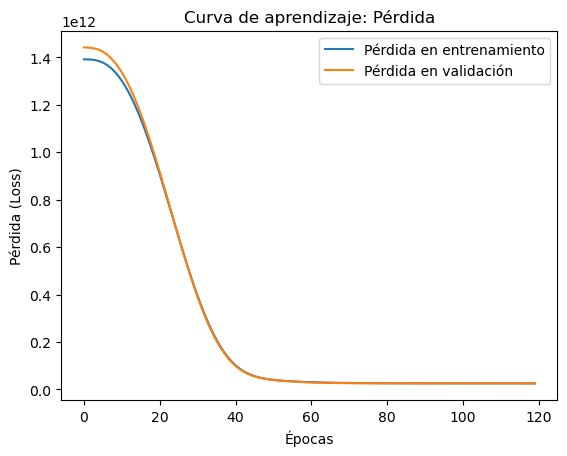

In [22]:
import matplotlib.pyplot as plt

# Graficar la pérdida en entrenamiento
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Curva de aprendizaje: Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (Loss)')
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

# calcular r2,rmse y mse para ver el rendimiento
r2 = r2_score(y_test, predicciones)
rmse = np.sqrt(mean_squared_error(y_test, predicciones))
mse = mean_squared_error(y_test, predicciones)


print(f"R2: {r2}")
print(f"RMSE: {rmse}")
print(f"MSE: {mse}")

R2: 0.9158180827799166
RMSE: 164056.99204357035
MSE: 26914696638.3841


# Regresion Lineal

In [24]:
from sklearn.linear_model import LinearRegression


linear = LinearRegression()
linear.fit(X_train_scaled, y_train)


y_pred_linear = model.predict(X_test_scaled)

# Evaluar el modelo
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))


print("RMSE:", rmse_linear)
print("MSE:", mse_linear)
print("R²:", r2_linear)


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
RMSE: 164056.99204357035
MSE: 26914696638.3841
R²: 0.9158180827799166


# KNN

In [25]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
# Optimización de hiperparámetros para el valor de k en KNN
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Obtener el mejor valor de k
best_k = grid_search.best_params_['n_neighbors']
print(f"Mejor valor de k: {best_k}")

Mejor valor de k: 17


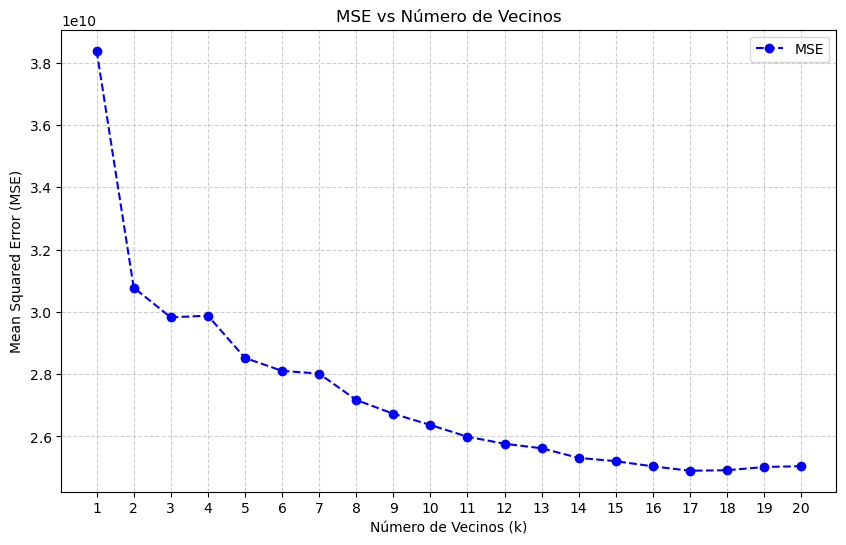

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener los resultados de la validación cruzada
results = grid_search.cv_results_

# Extraer valores de n_neighbors y los errores negativos (que se convierten a positivos)
k_values = param_grid['n_neighbors']  # Rango de k utilizado
mse_scores = -results['mean_test_score']  # Negativo para convertir a MSE positivo

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_scores, marker='o', linestyle='--', color='b', label='MSE')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Número de Vecinos')
plt.xticks(k_values)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


In [28]:
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

y_pred_knn= knn.predict(X_test_scaled)

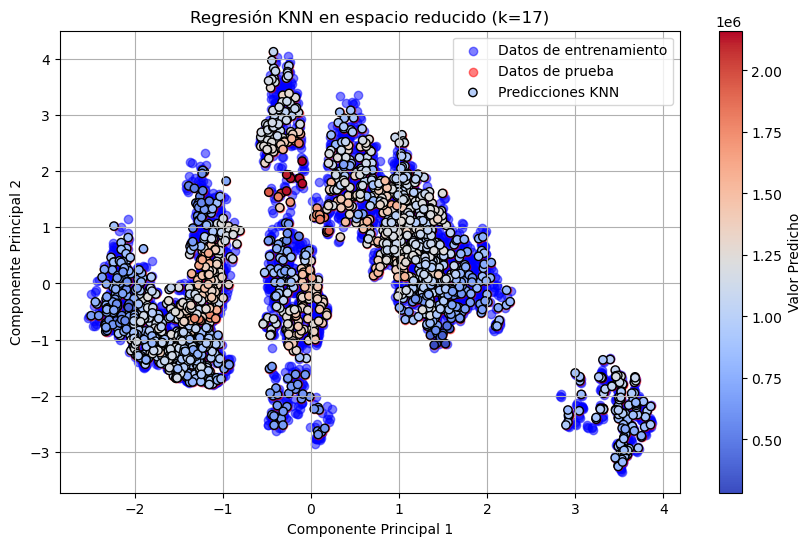

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Paso 1: Reducir a 2 dimensiones usando PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Paso 2: Entrenar el modelo KNN
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train_pca, y_train)

# Paso 3: Hacer predicciones sobre el conjunto de prueba
y_pred_knn = knn.predict(X_test_pca)

# Paso 4: Graficar los datos originales y las predicciones
plt.figure(figsize=(10, 6))

# Graficar los datos de entrenamiento
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], color='blue', label='Datos de entrenamiento', alpha=0.5)

# Graficar las predicciones de KNN
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], color='red', label='Datos de prueba', alpha=0.5)

# Graficar las predicciones de KNN (como puntos)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_knn, cmap='coolwarm', marker='o', edgecolors='k', label='Predicciones KNN')

# Personalización del gráfico
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title(f'Regresión KNN en espacio reducido (k={best_k})')
plt.legend()
plt.colorbar(label='Valor Predicho')  # Añadir barra de color para predicciones
plt.grid(True)
plt.show()


In [30]:
# Evaluar el rendimiento del modelo r2,rmse y mse
r2_knn = r2_score(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Mostrar los resultados
print(f"R2: {r2_knn}")
print(f"RMSE: {rmse_knn}")
print(f"MSE: {mse_knn}")

R2: 0.1755910222228938
RMSE: 513400.9815351038
MSE: 263580567841.20798
